In [1]:
import pandas as pd
from sqlalchemy import create_engine
from decouple import config

USER_DB = config("USER_DB", default='postgres')
PASSWORD_DB = config("PASSWORD_DB", default='password')
URL_DB = config("URL_DB", default='localhost')
NAME_DB = config("NAME_DB", default='db_name')
PORT_DB = config("PORT_DB", default='5432')
DB_URL = f"postgresql://{USER_DB}:{PASSWORD_DB}@{URL_DB}:{PORT_DB}/{NAME_DB}"


engine = create_engine(DB_URL)

In [2]:
df_pib = pd.read_sql('SELECT * FROM "PIP_Cepea"', con=engine, index_col='index')

df_pib.head()

,ano,insumos,agropecuária,industria,servicos,total,ramo,pib_renda
index,,,,,,,,
0,1996.0,31597.663029,200211.777672,514755.882623,646536.982537,1.393102e+06,agronegocio,True
1,1997.0,32825.998197,199911.301734,482894.842674,604714.559307,1.320347e+06,agronegocio,True
2,1998.0,31818.410647,200969.741431,455966.002147,576123.413175,1.264878e+06,agronegocio,True
3,1999.0,34784.067160,206952.587184,453199.228768,573119.731296,1.268056e+06,agronegocio,True
4,2000.0,40682.954859,209175.390473,496957.470676,626206.339831,1.373022e+06,agronegocio,True


In [3]:
df_prod = pd.read_sql('SELECT * FROM "producao_2019"', con=engine, index_col='index')

df_prod.head()

,uf,mes,area,prod
index,,,,
0,ACRE,ate_abril,44487,89948
1,ALAGOAS,ate_abril,45842,95917
2,AMAPÁ,ate_abril,21548,50813
3,AMAZONAS,ate_abril,22930,41207
4,BAHIA,ate_abril,3130065,8283660


### Qual a porcentagem de participação da região Centro-Oeste na produção nacional no primeiro semestre de 2019?

In [4]:
total_br = df_prod['prod'].sum()

f'Produção nacional: {total_br}t'

'Produção nacional: 734755476t'

In [5]:
total_co = df_prod[
    df_prod['uf'].isin(
        ['DISTRITO FEDERAL', 'GOIÁS', 'MATO GROSSO', 'MATO GROSSO DO SUL']
    )
]['prod'].sum()

f'Produção da região centro-oeste: {total_co}t'

'Produção da região centro-oeste: 343321217t'

In [6]:
co_percent = total_co / total_br * 100

f'{total_co} = {round(co_percent, 2)}% de {total_br}'

'343321217 = 46.73% de 734755476'

### Qual estado possui maior área produtiva? 

In [7]:
df_prod[(df_prod['mes'] == 'junho') & (df_prod['area'] ==  df_prod['area'].max())]['uf']

index
64    MATO GROSSO
Name: uf, dtype: object

### Qual a média de produção mensal para o estado de São Paulo?

In [8]:
df_prod_sp = df_prod[df_prod['uf'] == 'SÃO PAULO']
bf_abril = df_prod_sp[df_prod_sp['mes'] == 'ate_abril']['prod'] * 3
sp_mean = (df_prod_sp['prod'].sum() + bf_abril) / 6

sp_mean

index
24    9414458.5
Name: prod, dtype: float64

### Defina a correlação entre a produção agrícola e o PIB do Ramo Agrícola e Pecuário em 2019. Qual segmento possui maior correlação e qual possui menor correlação? Demonstre num gráfico e explique os coeficientes.

In [9]:
df_prod.corr()

,area,prod
area,1.000000,0.992412
prod,0.992412,1.000000


In [10]:
df_pib.corr()

,ano,insumos,agropecuária,industria,servicos,total,pib_renda
ano,1.000000e+00,0.545015,0.519230,0.198335,0.286062,0.325889,2.459433e-14
insumos,5.450153e-01,1.000000,0.973326,0.864730,0.907930,0.930062,3.998403e-01
agropecuária,5.192301e-01,0.973326,1.000000,0.897620,0.940588,0.959428,4.086761e-01
industria,1.983350e-01,0.864730,0.897620,1.000000,0.980701,0.982835,4.676251e-01
servicos,2.860618e-01,0.907930,0.940588,0.980701,1.000000,0.995782,4.980335e-01
total,3.258893e-01,0.930062,0.959428,0.982835,0.995782,1.000000,4.730952e-01
pib_renda,2.459433e-14,0.399840,0.408676,0.467625,0.498033,0.473095,1.000000e+00


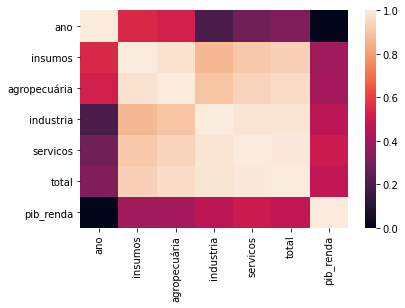

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df_pib.corr())
plt.show()

In [12]:
df_pib[df_pib['ano'] == 2019]

,ano,insumos,agropecuária,industria,servicos,total,ramo,pib_renda
index,,,,,,,,
23,2019.0,79130.818287,351035.195543,466608.351831,656221.019925,1.552995e+06,agronegocio,True
48,2019.0,53871.004356,212553.269697,361527.847364,430287.329830,1.058239e+06,agricola,True
73,2019.0,25259.813930,138481.925846,105080.504467,225933.690095,4.947559e+05,pecuario,True
98,2019.0,79130.818287,351035.195543,466608.351831,656221.019925,1.552995e+06,agronegocio,False
123,2019.0,53871.004356,212553.269697,361527.847364,430287.329830,1.058239e+06,agricola,False
148,2019.0,25259.813930,138481.925846,105080.504467,225933.690095,4.947559e+05,pecuario,False


In [13]:
df_prod.head()

,uf,mes,area,prod
index,,,,
0,ACRE,ate_abril,44487,89948
1,ALAGOAS,ate_abril,45842,95917
2,AMAPÁ,ate_abril,21548,50813
3,AMAZONAS,ate_abril,22930,41207
4,BAHIA,ate_abril,3130065,8283660


In [14]:
df_prod_2019 = df_prod.groupby(['uf']).sum()

df_prod_2019.head()

,area,prod
uf,,
ACRE,123200,262584
ALAGOAS,206510,306900
AMAPÁ,67232,174143
AMAZONAS,68790,124047
BAHIA,9323795,26708022


In [15]:
df_pib_2019 = df_pib[df_pib['ano'] == 2019]

df_pib_2019.head()

,ano,insumos,agropecuária,industria,servicos,total,ramo,pib_renda
index,,,,,,,,
23,2019.0,79130.818287,351035.195543,466608.351831,656221.019925,1.552995e+06,agronegocio,True
48,2019.0,53871.004356,212553.269697,361527.847364,430287.329830,1.058239e+06,agricola,True
73,2019.0,25259.813930,138481.925846,105080.504467,225933.690095,4.947559e+05,pecuario,True
98,2019.0,79130.818287,351035.195543,466608.351831,656221.019925,1.552995e+06,agronegocio,False
123,2019.0,53871.004356,212553.269697,361527.847364,430287.329830,1.058239e+06,agricola,False


In [16]:
df_prod_2019 = df_prod_2019.assign(ano=2019.0)

df_prod_2019.head()

,area,prod,ano
uf,,,
ACRE,123200,262584,2019.0
ALAGOAS,206510,306900,2019.0
AMAPÁ,67232,174143,2019.0
AMAZONAS,68790,124047,2019.0
BAHIA,9323795,26708022,2019.0


In [17]:
df_pib_2019.groupby(['ramo', 'pib_renda']).sum()

ano       insumos   agropecuária      industria  \
ramo        pib_renda                                                       
agricola    False      2019.0  53871.004356  212553.269697  361527.847364   
            True       2019.0  53871.004356  212553.269697  361527.847364   
agronegocio False      2019.0  79130.818287  351035.195543  466608.351831   
            True       2019.0  79130.818287  351035.195543  466608.351831   
pecuario    False      2019.0  25259.813930  138481.925846  105080.504467   
            True       2019.0  25259.813930  138481.925846  105080.504467   

                            servicos         total  
ramo        pib_renda                               
agricola    False      430287.329830  1.058239e+06  
            True       430287.329830  1.058239e+06  
agronegocio False      656221.019925  1.552995e+06  
            True       656221.019925  1.552995e+06  
pecuario    False      225933.690095  4.947559e+05  
            True       225933.690095  4.947559e+05

In [31]:
df_prod_pib_2019 = df_prod_2019.set_index('ano').join(df_pib_2019.set_index('ano'), on=['ano'], lsuffix='_prd', rsuffix='_pib')

df_prod_pib_2019.sample(5)

,area,prod,insumos,agropecuária,industria,servicos,total,ramo,pib_renda
ano,,,,,,,,,
2019.0,14832858,58165632,53871.004356,212553.269697,361527.847364,430287.329830,1.058239e+06,agricola,True
2019.0,68790,124047,79130.818287,351035.195543,466608.351831,656221.019925,1.552995e+06,agronegocio,False
2019.0,68790,124047,25259.813930,138481.925846,105080.504467,225933.690095,4.947559e+05,pecuario,False
2019.0,29228261,117060503,25259.813930,138481.925846,105080.504467,225933.690095,4.947559e+05,pecuario,False
2019.0,68737,145113,53871.004356,212553.269697,361527.847364,430287.329830,1.058239e+06,agricola,False


In [32]:
df_prod_pib_2019.corr()

,area,prod,insumos,agropecuária,industria,servicos,total,pib_renda
area,1.000000e+00,9.940766e-01,-2.402079e-17,-1.462689e-17,-7.658991e-17,1.394972e-16,-1.195226e-16,-4.007872e-17
prod,9.940766e-01,1.000000e+00,-3.498877e-17,-1.288111e-17,-8.668674e-17,1.505392e-16,-1.205860e-16,-4.477061e-17
insumos,-2.402079e-17,-3.498877e-17,1.000000e+00,9.782171e-01,9.798121e-01,9.978980e-01,9.999988e-01,9.183923e-18
agropecuária,-1.462689e-17,-1.288111e-17,9.782171e-01,1.000000e+00,9.169685e-01,9.896132e-01,9.778886e-01,9.177162e-18
industria,-7.658991e-17,-8.668674e-17,9.798121e-01,9.169685e-01,1.000000e+00,9.647968e-01,9.801261e-01,2.011344e-17
servicos,1.394972e-16,1.505392e-16,9.978980e-01,9.896132e-01,9.647968e-01,1.000000e+00,9.977946e-01,-4.089123e-18
total,-1.195226e-16,-1.205860e-16,9.999988e-01,9.778886e-01,9.801261e-01,9.977946e-01,1.000000e+00,-9.973164e-18
pib_renda,-4.007872e-17,-4.477061e-17,9.183923e-18,9.177162e-18,2.011344e-17,-4.089123e-18,-9.973164e-18,1.000000e+00


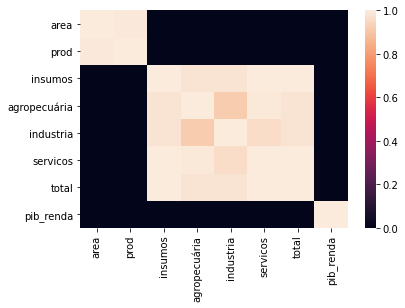

In [29]:
sns.heatmap(df_prod_pib_2019.corr())
plt.show()